In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

### Exploratory Data Analysis - wybrane parametry

Wybrane parametry z poprzedniego etapu:
- <b>Y</b> - zmienna objaśniana oznaczająca przynależność bądź też nie do szarej strefy
- <b>woj</b> - Województwo, z którego wzięta została dana obserwacja (stworzona zostanie zmienna dzieląca województwa na blok wschodni oraz zachodni
- <b>miejsce_4k</b> - typ miasta/wsi w podziale na 4 kategorie (wieś, miasto do 20k, miasto 20-100k, miasto powyżej 100k obywateli)
- <b>wiek</b> - wiek badanych osób
- <b>wiek_3k</b> - wiek badanych osób z podziałem na 3 kategorie
- <b>wiek_4k</b> - wiek badanych osób z podziałem na 4 kategorie
- <b>m2</b> - płeć badanej osoby
- <b>wykszt_4k</b> - wykształcenie z podziałem an 4 kategorie (średnie, zasadnicze zawodowe, wyższe, gimnazjalne i mniej)
- <b>matura</b> - czy osoba posiadała mature
- <b>p1</b> - czy prowadzi działalność gospodarczą
- <b>p1_typ</b> - typ prowadzonej działalności gospodarczej
- <b>p14</b> - jak zmieniły się Pana/Pani dochody w ciągu ostatnich lat
- <b>c1</b> - Czy w ciągu ostatnich 12 miesięcy pomagał(a) Pan(i)nieodpłatnie w rodzinnej działalności gospodarczej lub rolniczej? (pomyśleć czy uwzględnić, gdyż pytanie wręcz nasuwa przynależność do szarej strefy)
- <b>c2</b> - Czy tę pracę Pan(i) nadal wykonuje, czy została ona już zakończona bądź tymczasowo przerwana?
- <b>y1</b> - Czy w minionych 12 miesiącach pracował(a) Pan(i) zarobkowo za granicą?
- <b>y1_1</b> - Ile miesięcy Pan(i) pracował(a)?
- <b>y2</b> - A czy w najbliższych 12 miesiącach zamierza Pan(i) pracować zarobkowo za granicą?
- <b>g1</b> - ma pracę i wykonuje/nie ma pracy lub ma przerwę
- <b>s1</b> - Czy poszukuje Pan(i) jakiejś innej pracy, poza tą, którą Pan(i) obecnie wykonuje?
- <b>m5</b> - Jaki jest Pana obecny stan cywilny? (może podzielić na mniejsze kategorie?
- <b>m6</b> - Czy ma Pan/Pani dziecko?
- <b>m9_1</b> - Przedziały zarobkowe



In [2]:
Ludnosc_df = pd.read_spss(r'C:\Users\mateu\Desktop\Python_SCRIPTS\GUS_praktyki\Ludnosc_BKL_2019.sav')

# Warunki z ankiety - odpowiedzi na pytania dotyczące pracowania w szarej strefie
conditions = [
    (Ludnosc_df['j6'] == "tak"),
    (Ludnosc_df['n1'] == "tak"),
    (Ludnosc_df['j6'] == "nie"),
    (Ludnosc_df['n1'] == "nie"),
    ]

# Dobór wartości do powyższych warunków
values = [1, 1, 0, 0]

# Tworzymy zmienną objaśnianą
Ludnosc_df["Y"]  = np.select(conditions, values)

C:\Users\mateu\AppData\Local\Temp/ipykernel_31664/3334247715.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Ludnosc_df["Y"]  = np.select(conditions, values)


# Tworzenie bazowego datasetu z kluczowymi parametrami

In [3]:
df = Ludnosc_df[['respid', 'Y', 'woj', 'miejsce_4k', 'wiek', 'wiek_3k', 'wiek_4k', 'm2', 'wykszt_4k', 'matura', 'p1', 
                 'p1_typ', 'p14', 'c1', 'c2', 'y1', 'y1_1', 'y2', 'g1', 's1', 'm5', 'm6', 'm9_1']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   respid      2533 non-null   float64 
 1   Y           2533 non-null   int32   
 2   woj         2533 non-null   category
 3   miejsce_4k  2527 non-null   category
 4   wiek        2533 non-null   float64 
 5   wiek_3k     2533 non-null   category
 6   wiek_4k     2533 non-null   category
 7   m2          2533 non-null   category
 8   wykszt_4k   2531 non-null   category
 9   matura      2533 non-null   category
 10  p1          2533 non-null   category
 11  p1_typ      348 non-null    category
 12  p14         350 non-null    category
 13  c1          2532 non-null   category
 14  c2          2533 non-null   category
 15  y1          2532 non-null   category
 16  y1_1        2532 non-null   category
 17  y2          2532 non-null   category
 18  g1          2532 non-null   category
 19  s1    

# Data engineering

### Kolumna 'woj'

In [5]:
df['woj'] = np.where(df['woj'].isin(['WARMIŃSKO-MAZURSKIE (woj.)', 'PODLASKIE (woj.)', 'LUBELSKIE (woj.)',
                                    'ŚWIĘTOKRZYSKIE (woj.)', 'PODKARPACKIE (woj.)']), 'wschodnie', 'zachodnie')

C:\Users\mateu\AppData\Local\Temp/ipykernel_31664/607998422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['woj'] = np.where(df['woj'].isin(['WARMIŃSKO-MAZURSKIE (woj.)', 'PODLASKIE (woj.)', 'LUBELSKIE (woj.)',


In [6]:
df['woj'] = df['woj'].astype('category')

C:\Users\mateu\AppData\Local\Temp/ipykernel_31664/3013812398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['woj'] = df['woj'].astype('category')


### Kolumna 'g1'

In [7]:
df['g1'] = np.where(df['g1'].isin(['nie ma pracy lub ma przerwę w pracy dłuższą niż 3 miesiące']), 'nie ma pracy', 'ma pracę')

C:\Users\mateu\AppData\Local\Temp/ipykernel_31664/4142069531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g1'] = np.where(df['g1'].isin(['nie ma pracy lub ma przerwę w pracy dłuższą niż 3 miesiące']), 'nie ma pracy', 'ma pracę')


In [8]:
df['g1'] = df['g1'].astype('category')

C:\Users\mateu\AppData\Local\Temp/ipykernel_31664/1023371915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g1'] = df['g1'].astype('category')


# EDA - numerical variables

[Text(0.5, 1.0, 'Czy pracujesz w szarej strefie?'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

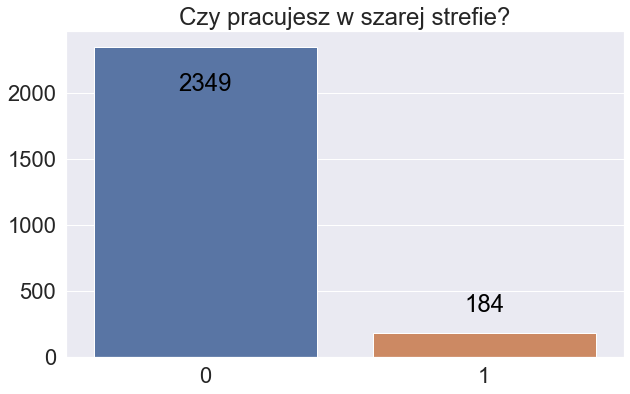

In [9]:
fig = plt.figure(figsize = (10, 6))
sns.set(font_scale = 2)
ax = sns.countplot(x = "Y", data = Ludnosc_df)
ax.annotate(f'\n{ax.patches[0].get_height()}', (ax.patches[0].get_x()+0.4, ax.patches[0].get_height()), ha='center', va='top', color='black', size=24)
ax.annotate(f'\n{ax.patches[1].get_height()}', (ax.patches[1].get_x()+0.4, ax.patches[1].get_height()+500), ha='center', va='top', color='black', size=24)
ax.set(title = "Czy pracujesz w szarej strefie?", xlabel = "", ylabel = "")

Jak widać na załączonym powyżej wykresie - istnieje bardzo duża dysproporcja pomiędzy wartościami obu zmiennych. Będzie trzeba wyrównać poziom obu powyższych parametrów.


Przykładowo wykorzystać można następujące algorytmy: Resampling (Oversampling, undersampling) bądź też algorytm SMOTE.

W trakcie dalszej analizy należy wziąć pod uwagę problem nierówności klas. Może to wpływać na korelację poszczególnych zmiennych.

<AxesSubplot:xlabel='wiek', ylabel='Count'>

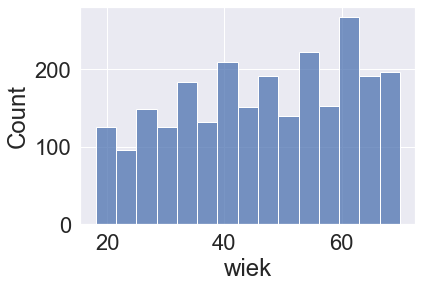

In [10]:
sns.histplot(df['wiek'])

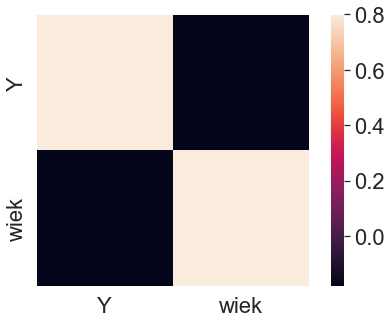

In [11]:
#correlation matrix
corrmat = df[['Y','wiek']].corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
corrmat

,Y,wiek
Y,1.000000,-0.181188
wiek,-0.181188,1.000000


Wzrost wieku powoduje jednoczesny spadek przynależności do szarej strefy. Oznaczać to może, że starsi ludzie są mniej skłonni do brania udziału w szarej strefie.

# EDA - categorical variables

### Analiza zmiennych z bardzo małą ilością obserwacji (dużo nulli)

In [13]:
df[['p1_typ', 'p14', 's1']]

,p1_typ,p14,s1
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2528,NaN,NaN,NaN
2529,NaN,NaN,NaN
2530,NaN,NaN,nie
2531,NaN,NaN,NaN


In [14]:
df['p1_typ'].value_counts() 

pozarolnicza    195
rolnicza        153
Name: p1_typ, dtype: int64

In [15]:
df['p14'].value_counts() 

pozostały bez zmian         195
trochę się zwiększyły        66
trochę się zmniejszyły       53
znacznie się zmniejszyły     18
znacznie się zwiększyły      12
trudno powiedzieć             4
odmowa odpowiedzi             2
Name: p14, dtype: int64

In [16]:
df['s1'].value_counts() 

nie    1425
tak     129
Name: s1, dtype: int64

In [17]:
cat_df_imbalanced = pd.get_dummies(df[['Y','p1_typ', 'p14', 's1']])

In [18]:
cat_df_imbalanced.corr()

,Y,p1_typ_pozarolnicza,p1_typ_rolnicza,p14_odmowa odpowiedzi,p14_pozostały bez zmian,p14_trochę się zmniejszyły,p14_trochę się zwiększyły,p14_trudno powiedzieć,p14_znacznie się zmniejszyły,p14_znacznie się zwiększyły,s1_nie,s1_tak
Y,1.000000,-0.046591,-0.013498,-0.007867,-0.040885,-0.009033,0.001964,-0.011131,-0.023677,-0.019310,0.019889,0.128890
p1_typ_pozarolnicza,-0.046591,1.000000,-0.073224,0.097336,0.444408,0.175077,0.473390,0.100410,0.134252,0.174191,0.224803,-0.006271
p1_typ_rolnicza,-0.013498,-0.073224,1.000000,-0.007127,0.542232,0.333434,0.062556,0.031651,0.136379,0.054908,0.173464,0.001568
p14_odmowa odpowiedzi,-0.007867,0.097336,-0.007127,1.000000,-0.008118,-0.004109,-0.004598,-0.001118,-0.002378,-0.001939,0.024787,-0.006512
p14_pozostały bez zmian,-0.040885,0.444408,0.542232,-0.008118,1.000000,-0.042219,-0.047237,-0.011486,-0.024432,-0.019925,0.218832,-0.019744
p14_trochę się zmniejszyły,-0.009033,0.175077,0.333434,-0.004109,-0.042219,1.000000,-0.023911,-0.005814,-0.012367,-0.010086,0.112226,-0.008772
p14_trochę się zwiększyły,0.001964,0.473390,0.062556,-0.004598,-0.047237,-0.023911,1.000000,-0.006505,-0.013837,-0.011285,0.129241,-0.004072
p14_trudno powiedzieć,-0.011131,0.100410,0.031651,-0.001118,-0.011486,-0.005814,-0.006505,1.000000,-0.003365,-0.002744,-0.005017,0.081235
p14_znacznie się zmniejszyły,-0.023677,0.134252,0.136379,-0.002378,-0.024432,-0.012367,-0.013837,-0.003365,1.000000,-0.005837,0.036701,0.044537
p14_znacznie się zwiększyły,-0.019310,0.174191,0.054908,-0.001939,-0.019925,-0.010086,-0.011285,-0.002744,-0.005837,1.000000,0.049247,-0.015982


Patrząc z perspektywy powyższej korelacji - na pewno należy odrzucić zmienną p14. Nie wpływa ona znacząco na zmienną objaśnianą, a dodatkowo zawiera dużo braków w danych.

In [19]:
cat_df_imbalanced = pd.get_dummies(df[['Y','p1_typ', 's1']])

In [20]:
cat_df_imbalanced.corr()

,Y,p1_typ_pozarolnicza,p1_typ_rolnicza,s1_nie,s1_tak
Y,1.000000,-0.046591,-0.013498,0.019889,0.128890
p1_typ_pozarolnicza,-0.046591,1.000000,-0.073224,0.224803,-0.006271
p1_typ_rolnicza,-0.013498,-0.073224,1.000000,0.173464,0.001568
s1_nie,0.019889,0.224803,0.173464,1.000000,-0.262703
s1_tak,0.128890,-0.006271,0.001568,-0.262703,1.000000


Pozostałe zmienne uwzględnimy w dalszej analizie.

In [21]:
df.drop(columns = 'p14', inplace = True)

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df.drop(columns = 'm9_1', inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   respid      2533 non-null   float64 
 1   Y           2533 non-null   int32   
 2   woj         2533 non-null   category
 3   miejsce_4k  2527 non-null   category
 4   wiek        2533 non-null   float64 
 5   wiek_3k     2533 non-null   category
 6   wiek_4k     2533 non-null   category
 7   m2          2533 non-null   category
 8   wykszt_4k   2531 non-null   category
 9   matura      2533 non-null   category
 10  p1          2533 non-null   category
 11  p1_typ      348 non-null    category
 12  c1          2532 non-null   category
 13  c2          2533 non-null   category
 14  y1          2532 non-null   category
 15  y1_1        2532 non-null   category
 16  y2          2532 non-null   category
 17  g1          2533 non-null   category
 18  s1          1554 non-null   category
 19  m5    

# Tworzenie zmiennych 'dummy' (0 - 1)

In [24]:
df = pd.get_dummies(df)

In [25]:
df['p1_tak']

0       0
1       0
2       0
3       0
4       0
       ..
2528    0
2529    0
2530    0
2531    0
2532    0
Name: p1_tak, Length: 2533, dtype: uint8

# Podział na zmienną objaśnianą oraz objaśniające

In [26]:
y = df.pop('Y')
X = df.drop(columns = ['respid'])

In [29]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (2533, 59)
Shape of y: (2533,)


Użyty został stratify, aby podzielić dane w zależności od wartości znalezionych w zmiennej objaśnianej.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [32]:
print("Liczba obserwacji X_train: ", X_train.shape)
print("Liczba obserwacji y_train: ", y_train.shape)
print("Liczba obserwacji X_test: ", X_test.shape)
print("Liczba obserwacji y_test: ", y_test.shape)

Liczba obserwacji X_train:  (2026, 59)
Liczba obserwacji y_train:  (2026,)
Liczba obserwacji X_test:  (507, 59)
Liczba obserwacji y_test:  (507,)


# Algorytm SMOTE dla niezbalansowanej klasy

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=420)
X_res, y_res = sm.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'